## Introducción al problema

El examen Saber 11, dirigido por el ICFES, es la prueba que marca la culminación de la etapa académica de los jóvenes en Colombia y evalúa competencias en Matemáticas, Lectura Crítica, Sociales y Ciudadanas, Ciencias Naturales e Inglés. Además de los resultados, la prueba recoge información económica, académica, social y demográfica de los estudiantes, lo que permite analizar cómo factores como pertenecer a una minoría étnica, el acceso a las TIC o la zona de residencia influyen en el desempeño. Este enfoque integral facilita la identificación de poblaciones en situación de vulnerabilidad y brinda insumos para orientar políticas de apoyo, como becas o subsidios, con el fin de reducir desigualdades educativas en el país.

## Pregunta SMART

¿En qué medida las características sociodemográficas, económicas y académicas de los evaluados en el examen Saber 11 del año 2024 se relacionan con su puntaje global obtenido en la prueba, y cómo podrían estos hallazgos orientar estrategias de apoyo educativo focalizado?

## Acciones Preliminares

En esta sección del notebook realizaremos la importación de las librerias a utilizar y configuraciones en las graficas a mostrar para manejar reportes visualmente homogeneo.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import kruskal
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)


sns.set(style="whitegrid", font="DejaVu Sans", rc={"axes.titleweight": "bold", "axes.titlesize": 18,
                                                   "axes.labelsize": 14, "xtick.labelsize": 12, "ytick.labelsize": 12})

icesi_blue = "#5454E9"
icesi_green = "#4CB979"
icesi_yellow = "#E4EB60"
icesi_purple = "#865CF0"

In [31]:
df = pd.read_csv('D:\Examen_Saber_11_2024.csv', sep=',')
df.head()

,periodo,estu_consecutivo,estu_estudiante,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,...,percentil_ingles,percentil_lectura_critica,percentil_matematicas,percentil_sociales_ciudadanas,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
0,20241,SB11202410000447,ESTUDIANTE,TI,URBANO,S,B,ACADÉMICO,3.118480e+11,3.118480e+11,...,89.0,78,66,91,64,344,84.0,69,65,72
1,20241,SB11202410095326,ESTUDIANTE,CC,URBANO,NaN,A,NaN,3.110018e+11,3.110018e+11,...,23.0,45,47,24,43,250,47.0,58,57,43
2,20241,SB11202410095321,ESTUDIANTE,PPT,URBANO,NaN,B,NaN,4.110018e+11,4.110018e+11,...,44.0,23,19,6,53,229,61.0,49,43,33
3,20241,SB11202410032253,ESTUDIANTE,TI,URBANO,N,B,TÉCNICO/ACADÉMICO,3.760010e+11,3.760010e+11,...,51.0,28,39,57,63,286,66.0,51,53,59
4,20241,SB11202410095319,ESTUDIANTE,TI,URBANO,NaN,B,NaN,4.110018e+11,4.110018e+11,...,63.0,46,36,50,55,285,74.0,59,52,56


In [32]:
df.shape

(676508, 84)

De lo anterior vemos que se cuenta con 676,508 registros y 84 variables.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676508 entries, 0 to 676507
Data columns (total 84 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   periodo                        676508 non-null  int64  
 1   estu_consecutivo               676508 non-null  object 
 2   estu_estudiante                676508 non-null  object 
 3   estu_tipodocumento             676507 non-null  object 
 4   cole_area_ubicacion            577927 non-null  object 
 5   cole_bilingue                  463331 non-null  object 
 6   cole_calendario                577927 non-null  object 
 7   cole_caracter                  549448 non-null  object 
 8   cole_cod_dane_establecimiento  577927 non-null  float64
 9   cole_cod_dane_sede             577927 non-null  float64
 10  cole_cod_depto_ubicacion       577927 non-null  float64
 11  cole_cod_mcpio_ubicacion       577927 non-null  float64
 12  cole_codigo_icfes             

In [34]:
print(df.isnull().sum()[df.isnull().sum() > 0])

estu_tipodocumento                    1
cole_area_ubicacion               98581
cole_bilingue                    213177
cole_calendario                   98581
cole_caracter                    127060
cole_cod_dane_establecimiento     98581
cole_cod_dane_sede                98581
cole_cod_depto_ubicacion          98581
cole_cod_mcpio_ubicacion          98581
cole_codigo_icfes                 98581
cole_depto_ubicacion              98581
cole_genero                       98581
cole_jornada                      98581
cole_mcpio_ubicacion              98581
cole_naturaleza                   98581
cole_nombre_establecimiento       98581
cole_nombre_sede                  98581
cole_sede_principal               98581
desemp_ingles                      7308
estu_cod_depto_presentacion          19
estu_cod_mcpio_presentacion          19
estu_cod_reside_depto              4444
estu_cod_reside_mcpio              4444
estu_dedicacioninternet          162720
estu_dedicacionlecturadiaria     161636


Se observa que de las 84 variables, 66 presentan valores nulos.

In [35]:
df.describe()

,periodo,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,desemp_c_naturales,desemp_lectura_critica,desemp_matematicas,desemp_sociales_ciudadanas,...,percentil_ingles,percentil_lectura_critica,percentil_matematicas,percentil_sociales_ciudadanas,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
count,676508.000000,5.779270e+05,5.779270e+05,577927.000000,577927.000000,577927.000000,676508.000000,676508.000000,676508.000000,676508.000000,...,669200.000000,676508.000000,676508.000000,676508.000000,676508.000000,676508.000000,669200.000000,676508.000000,676508.000000,676508.000000
mean,20241.875727,2.081932e+11,2.086724e+11,32.962215,33205.094716,327914.591381,2.145077,2.698822,2.496274,2.053526,...,47.079414,47.519966,47.587725,48.370473,50.281698,255.384978,51.580586,53.503808,51.724781,48.669348
std,0.329894,9.408361e+10,9.448952e+10,26.430266,26450.812269,303240.662261,0.791463,0.776735,0.799461,0.848082,...,28.920060,29.116195,29.059164,28.888190,11.044992,54.371379,13.318986,10.961292,13.236242,12.362031
min,20241.000000,1.050010e+11,1.050010e+11,5.000000,5001.000000,59.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20242.000000,1.190010e+11,1.190010e+11,11.000000,11001.000000,72389.000000,2.000000,2.000000,2.000000,1.000000,...,22.000000,22.000000,22.000000,23.000000,42.000000,214.000000,43.000000,46.000000,42.000000,39.000000
50%,20242.000000,1.760010e+11,1.760010e+11,23.000000,23001.000000,160556.000000,2.000000,3.000000,3.000000,2.000000,...,45.000000,46.000000,46.000000,47.000000,50.000000,252.000000,49.000000,54.000000,52.000000,48.000000
75%,20242.000000,3.080010e+11,3.080010e+11,54.000000,54001.000000,717579.000000,3.000000,3.000000,3.000000,3.000000,...,72.000000,72.000000,72.000000,73.000000,58.000000,294.000000,59.000000,61.000000,61.000000,58.000000
max,20242.000000,5.684320e+11,8.180011e+11,99.000000,99773.000000,819656.000000,4.000000,4.000000,4.000000,4.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,496.000000,100.000000,100.000000,100.000000,100.000000


## Analisis Univariado

Como punto de partida en este notebook, y en el marco del análisis estadístico propuesto, se realizará un análisis univariado de la variable que consideramos central para el estudio: **punt_global**. Esta variable representa el puntaje total obtenido por cada estudiante en su intento del examen Saber 11, y será clave para comprender la distribución general del rendimiento académico dentro del conjunto de datos.

La variable **punt_global** muestra especial relevancia en este análisis, ya que constituye nuestra variable respuesta. Esta refleja, de manera agregada, el desempeño académico del estudiante en el examen Saber 11, proporcionando una aproximación al nivel de aprendizaje alcanzado al finalizar su etapa escolar. A partir de su comportamiento y en contraste con otras variables del conjunto de datos, es posible formular hipótesis sobre la influencia de diversos factores del entorno cotidiano en el proceso de aprendizaje de los jóvenes.

In [36]:
punt_global = df['punt_global'].dropna()
stats = punt_global.describe()
print("Estadísticas descriptivas punt_global:\n", stats)

Estadísticas descriptivas punt_global:
 count    676508.000000
mean        255.384978
std          54.371379
min           0.000000
25%         214.000000
50%         252.000000
75%         294.000000
max         496.000000
Name: punt_global, dtype: float64


Como existen puntajes con valor cero, se decide omitirlos en este analisis univariado porque es posible que sea un error operativo tal vez de las maquinas o artefactos utiizados para leer la cartilla de respuestas, que en este caso podria ser que no se tuvo una correcta lectura de la información.

In [37]:
df_0 = df[df['punt_global'] == 0]
print("Número de estudiantes con punt_global igual a 0:", len(df_0))

Número de estudiantes con punt_global igual a 0: 5


In [38]:
df_0

,periodo,estu_consecutivo,estu_estudiante,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,...,percentil_ingles,percentil_lectura_critica,percentil_matematicas,percentil_sociales_ciudadanas,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
66189,20241,SB11202410017916,INDIVIDUAL,TI,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1,1,1,0,0,0.0,0,0,0
76893,20241,SB11202410078907,INDIVIDUAL,CC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1,1,1,0,0,0.0,0,0,0
448869,20242,SB11202430418380,ESTUDIANTE,CC,URBANO,N,A,TÉCNICO/ACADÉMICO,3.050010e+11,3.050010e+11,...,1.0,1,1,1,0,0,0.0,0,0,0
508297,20242,SB11202430451253,ESTUDIANTE,CC,URBANO,N,A,ACADÉMICO,3.080010e+11,3.080010e+11,...,1.0,1,1,1,0,0,0.0,0,0,0
525016,20242,SB11202430157578,ESTUDIANTE,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.540010e+11,1.540010e+11,...,1.0,1,1,1,0,0,0.0,0,0,0


In [39]:
df = df[df['punt_global'] != 0]

In [40]:
punt_global = df['punt_global'].dropna()
stats = punt_global.describe()
print("Estadísticas descriptivas punt_global:\n", stats)

Estadísticas descriptivas punt_global:
 count    676503.000000
mean        255.386866
std          54.367147
min          10.000000
25%         214.000000
50%         252.000000
75%         294.000000
max         496.000000
Name: punt_global, dtype: float64


Luego de omitir los cinco puntajes iguales a cero, se obtiene que el puntaje promedio es de 255 y es similar a la mediana de 252 puntos. Además, la desviación estándar de 54 parece indicar que no hay mucha dispersión en los datos. También se observa que el puntaje minimo es de 10 y el mayor puntaje registrado en el 2024 fue de 496.

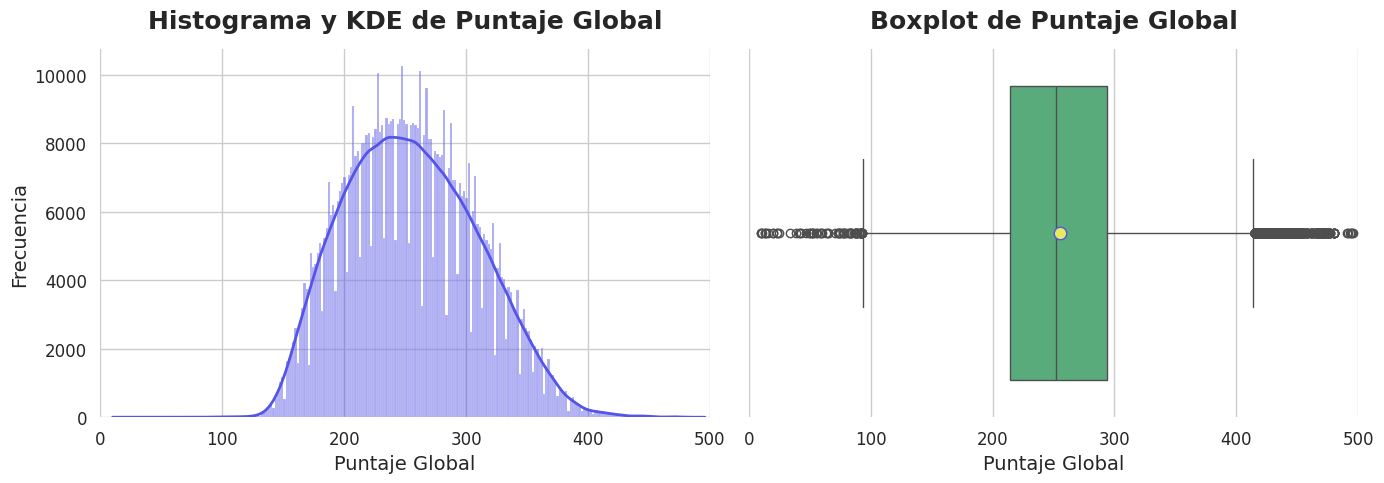

Limite Inferior: 94.0
Limite Superior: 414.0


In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(punt_global, kde=True, ax=axes[0], color=icesi_blue, line_kws={'color': icesi_green, 'linewidth': 2})
axes[0].set_title("Histograma y KDE de Puntaje Global", pad=15)
axes[0].set_xlabel("Puntaje Global")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xlim(0, 500)

sns.boxplot(x=punt_global, ax=axes[1], color=icesi_green, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": icesi_yellow, "markeredgecolor": icesi_blue, "markersize": 9})
axes[1].set_title("Boxplot de Puntaje Global", pad=15)
axes[1].set_xlabel("Puntaje Global")
axes[1].set_xlim(0, 500)

for spine in axes[0].spines.values(): spine.set_visible(False)
for spine in axes[1].spines.values(): spine.set_visible(False)

plt.tight_layout()
plt.show()

Q1 = punt_global.quantile(0.25)
Q3 = punt_global.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"Limite Inferior: {lower_bound}")
print(f"Limite Superior: {upper_bound}")

En el histograma del puntaje se observa que a grandes rasgos parece que dicha variable se distribuye normal pero se tendría que realizar una prueba formal de normalidad para comprobarlo.

Por otra parte, en el boxplot se observa que un puntaje se considera atípico si es menor que 94 y mayor que 414. Tambien se observa que el 50% de los puntajes se encuentra entre 214 y 294 según el cuartil 1 y 3.

In [42]:
stat, p = normaltest(punt_global)
alpha = 0.05
if p < alpha:
    print("La distribución de punt_global no es normal (rechazamos H0)")
else:
    print("La distribución de punt_global es normal (no rechazamos H0)")

La distribución de punt_global no es normal (rechazamos H0)


Al realizar la prueba de normalidad se observa que la variable puntaje no sigue una distribución normal como se habia observado a grandes rasgos en el histograma anterior.

In [43]:
intervals = pd.cut(punt_global, bins=[1, 100, 200, 300, 400, 500], right=False, labels=['1-99', '100-199', '200-299', '300-399', '400-500'])
counts = intervals.value_counts().sort_index()
print(counts)

punt_global
1-99           91
100-199    112669
200-299    413520
300-399    147496
400-500      2727
Name: count, dtype: int64


Se decide codificar la variable puntaje en cinco intervalos de tamaño 100 para ver las frecuencias por intervalo.

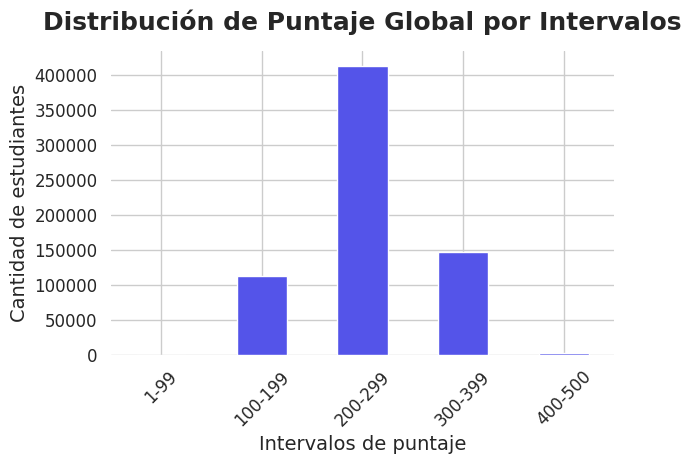

In [44]:
counts.plot(kind='bar', color=icesi_blue)
plt.title('Distribución de Puntaje Global por Intervalos', pad=15)
plt.xlabel('Intervalos de puntaje')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

De la gráfica anterior se observa que la mayor proporción de puntajes se encuentra entre 200 y 299, similar a lo encontrado en el boxplot.

## Conclusiones
Analizando la situación de los puntajes obtenidos por los jóvenes que realizaron el examen saber 11 en el año 2024 logramos destacar unos comportamientos referentes a una tendencia a lo que se podría considerar un bajo puntaje, haciendo aún más el contraste con la realidad que muchas universidades exigen un mínimo de 300 en promedio para ingresar a estas (ej: Universidad del Valle, Universidad Javeriana, Universidad Distrital, etc.) lo cual a grandes rasgos causa cierta preocupación sobre la situación académica del país. De manera más técnica se logra ver que se cuenta con una gran cantidad de observaciones bajo esta variable, dándonos la posibilidad de ejecutar diferentes ajustes a los datos en caso de ser necesaria la eliminación de registros por valores faltantes en las demás variables, dada la situación de que no se opte por usar métodos de imputación. Finalmente la variable punt_global se encuentra en óptimo estado para ser utilizada en futuros pasos de este análisis y es capaz de representar una realidad del país.


## Análisis Bivariado (Estrato socioeconomico)

Para continuar el análisis del puntaje global de la prueba, se elige la variable **fami_estratovivienda** con el fin de determinar si existe alguna diferencia entre los puntajes por estrato socioeconómico.

El porqué nos decidimos iniciar con esta variable radica en que el estrato socioeconómico de un hogar representa una clasificación (bajo 1 a alto 6) de viviendas mediante características del entorno, dándonos así una idea preliminar de la situación del hogar del estudiante y si esta influye en el desempeño académico del evaluado.

In [45]:
#Se define el orden de los estratos
estrato_order = [
    'Sin Estrato',
    'Estrato 1',
    'Estrato 2',
    'Estrato 3',
    'Estrato 4',
    'Estrato 5',
    'Estrato 6'
]

df['fami_estratovivienda'] = pd.Categorical(
    df['fami_estratovivienda'],
    categories=estrato_order,
    ordered=True
)
#Se crea un dataframe con las dos variables a analizar
df_f = df[['punt_global','fami_estratovivienda']].dropna()
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636986 entries, 0 to 673302
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   punt_global           636986 non-null  int64   
 1   fami_estratovivienda  636986 non-null  category
dtypes: category(1), int64(1)
memory usage: 10.3 MB


In [46]:
estrato_counts = df_f['fami_estratovivienda'].value_counts().reindex(estrato_order)
print(estrato_counts)

fami_estratovivienda
Sin Estrato     27496
Estrato 1      193641
Estrato 2      217577
Estrato 3      138887
Estrato 4       39144
Estrato 5       13030
Estrato 6        7211
Name: count, dtype: int64


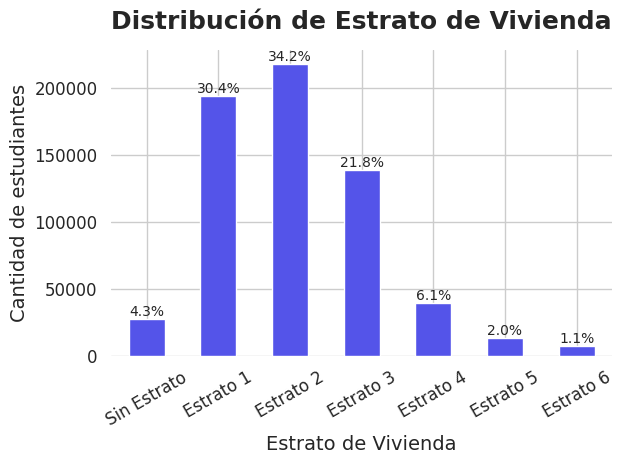

In [47]:
estrato_counts.plot(kind='bar', color=icesi_blue)
plt.title('Distribución de Estrato de Vivienda', pad=15)
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=30)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Agregar porcentaje a cada categoría
total = len(df_f)
for i, count in enumerate(estrato_counts):
    percentage = f'{(count / total) * 100:.1f}%'
    plt.text(i, count, percentage, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

En la gráfica anterior se observa que el estrato con mayor cantidad de estudiantes es el estrato 2, seguido de los estratos 1 y 3. Estos 3 estratos contienen el 86.4% de los evaluados.

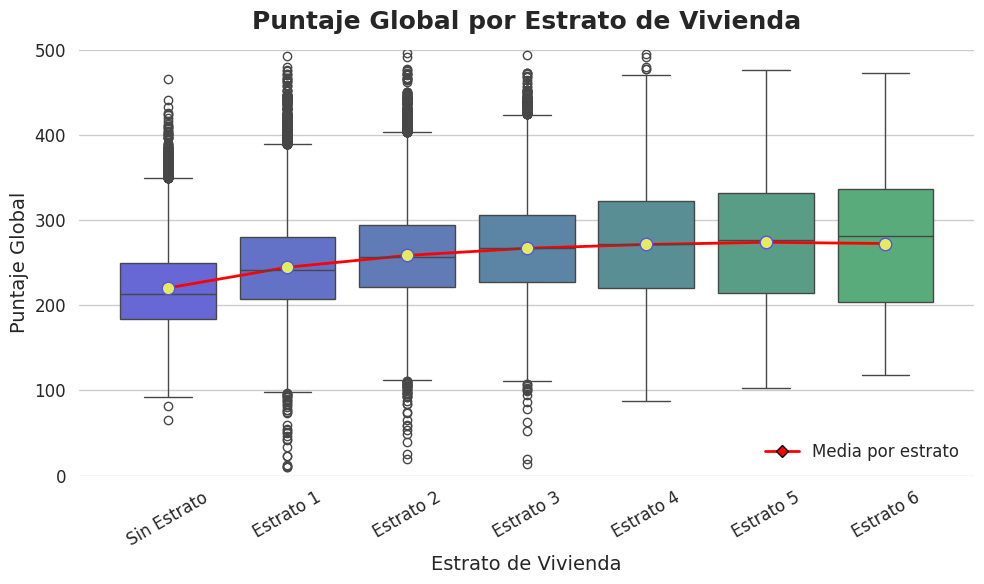

In [48]:
estratos = sorted(df_f['fami_estratovivienda'].unique(), key=lambda x: (x != 'Sin Estrato', x))
palette = sns.color_palette("blend:" + icesi_blue + "," + icesi_green, n_colors=len(estratos))

plt.figure(figsize=(10, 6))
sns.boxplot(x='fami_estratovivienda', y='punt_global', data=df_f, order=estratos, palette=palette, showmeans=True, meanprops={"marker": "o", "markerfacecolor": "#E4EB60", "markeredgecolor": icesi_blue, "markersize": 9})
plt.title('Puntaje Global por Estrato de Vivienda', pad=15)
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Puntaje Global')
plt.xticks(rotation=30)
plt.ylim(0, 500)
medias = df_f.groupby('fami_estratovivienda')['punt_global'].mean().reindex(estratos)
plt.plot(medias.index, medias.values, color='red', marker='D', markerfacecolor='red', markeredgecolor='black', linewidth=2, label='Media por estrato')
plt.legend(frameon=False, fontsize=12)
for spine in plt.gca().spines.values(): spine.set_visible(False)
plt.tight_layout()
plt.show()

Con la gráfica anterior se puede analizar el comportamiento del puntaje global por estrato, donde se evidencia cierta tendencia creciente del puntaje global medio a medida que aumenta el estrato socioeconómico.

Es importante destacar que desde la categoría Sin Estrato hasta el Estrato 4, existen valores atípicos tanto de puntajes altos y bajos, mientras que entre los estratos 5 y 6 no se cuenta con valores atípicos, lo que podría indicar que en el caso de los puntajes altos, es normal que se obtengan puntajes cercanos a 500. Aunque hay que tener en cuenta que los estratos altos tienen pocos evaluados en comparación a los demás.

In [49]:
print('\n Estadisticas del puntaje global por estrato')
print(df_f.groupby("fami_estratovivienda", observed=True)["punt_global"].describe())

grupos = df_f.groupby("fami_estratovivienda", observed=True)["punt_global"].apply(list).tolist()


 Estadisticas del puntaje global por estrato
                         count        mean        std    min    25%    50%  \
fami_estratovivienda                                                         
Sin Estrato            27496.0  220.365981  47.400217   65.0  184.0  213.0   
Estrato 1             193641.0  244.650900  50.317966   10.0  207.0  241.0   
Estrato 2             217577.0  258.538485  50.412367   20.0  221.0  257.0   
Estrato 3             138887.0  266.961220  53.707672   14.0  227.0  267.0   
Estrato 4              39144.0  271.416462  63.166215   88.0  220.0  272.0   
Estrato 5              13030.0  273.974981  69.081645  103.0  215.0  277.0   
Estrato 6               7211.0  272.526834  73.920129  118.0  204.0  281.0   

                        75%    max  
fami_estratovivienda                
Sin Estrato           250.0  466.0  
Estrato 1             280.0  493.0  
Estrato 2             294.0  496.0  
Estrato 3             306.0  494.0  
Estrato 4             322.0  

De manera numérica revisamos cómo se comportan los estratos bajo el puntaje global y se puede apreciar como en métricas de tendencia central (como la media) y de dispersión (como los cuartiles) se puede apreciar que a medida de subir en estrato socioeconómico sube el puntaje global. Dándonos a entender de clara manera que si hay cierta influencia entre el estrato y el puntaje.

In [50]:
#Prueba estadistica Kruskal-Wallis para determinar si hay diferencias de puntaje entre estratos
print('\n Prueba Kruskal-Wallis')
if len(grupos) > 1:
    h_stat, p_kw = kruskal(*grupos)
    print("Estadístico de prueba =", h_stat.round(2), ", Valor p =", p_kw)
else:
    print("No hay suficientes grupos con datos válidos para la prueba Kruskal-Wallis")


 Prueba Kruskal-Wallis
Estadístico de prueba = 30835.86 , Valor p = 0.0


Como anteriormente se comprobó que los datos no siguen una distribución normal y se busca determinar si existen diferencias entre los puntajes por estrato, se decide realizar una prueba no paramétrica, es decir, que no es necesario que los datos sigan una distribución normal.

Entonces se realiza la prueba Kruskall-Wallis, donde las hipótesis se definen de la siguiente manera:

* Ho: Todos los estratos tienen la misma distribución.

* Ha: Al menos uno de los estratos tiene una distribución distinta.

En esta prueba se obtiene un valor p de aproximadamente cero, lo que indica que se cuenta con suficiente evidencia para rechazar la hipótesis nula, por lo que al menos un estrato es diferente de los demás.

## Conclusiones análisis bivariado

En conclusión, el análisis realizado nos permite acercarnos al contraste de nuestra hipótesis inicial: existen factores sociodemográficos, económicos y académicos que influyen en el desempeño de los estudiantes, reflejado en el puntaje global del examen Saber 11. El primer contraste se estableció con el estrato socioeconómico, entendido como una representación de la realidad económica del hogar del estudiante. Los resultados muestran que, en contextos de hogares marginados (estratos bajos), los estudiantes tienden a obtener puntajes globales inferiores en comparación con aquellos pertenecientes a hogares más privilegiados (estratos altos). Este hallazgo resalta que los estudiantes de estratos bajos, o incluso sin clasificación socioeconómica, constituyen un grupo prioritario que requeriría apoyo o subsidios adicionales para favorecer su trayectoria académica.